In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cmath # For complex number mathematics

# Set a plotting style for better visualization
plt.style.use('seaborn-v0_8-darkgrid')

In [10]:
# --- System Parameters ---
V_ll_rms = 400  # Volts (Line-to-Line, RMS)
freq = 50.0       # Hertz

# --- Load Parameters (per phase) ---
R_load = 10.0     # Ohms
L_load = 0.03     # Henrys (30 mH)

# --- Derived Parameters ---
# For a Y-connected system, Phase Voltage = Line Voltage / sqrt(3)
V_ph_rms = V_ll_rms / np.sqrt(3)

# Angular frequency (radians per second)
omega = 2 * np.pi * freq

print(f"--- System Configuration ---")
print(f"Line-to-Line Voltage (V_ll): {V_ll_rms:.2f} V RMS")
print(f"Phase Voltage (V_ph):       {V_ph_rms:.2f} V RMS")
print(f"Frequency (f):              {freq:.1f} Hz")
print(f"Angular Frequency (ω):      {omega:.2f} rad/s")

--- System Configuration ---
Line-to-Line Voltage (V_ll): 400.00 V RMS
Phase Voltage (V_ph):       230.94 V RMS
Frequency (f):              50.0 Hz
Angular Frequency (ω):      314.16 rad/s


In [11]:
# 1. Calculate Inductive Reactance (X_L)
X_L = omega * L_load

# 2. Calculate Phase Impedance (Z_ph) as a complex number
Z_ph = complex(R_load, X_L)

# 3. Define the voltage phasor for Phase A as the reference (angle 0)
V_ph_phasor = cmath.rect(V_ph_rms, 0) # mag=V_ph_rms, angle=0 rad

# 4. Calculate the current phasor for Phase A using Ohm's Law
I_ph_phasor = V_ph_phasor / Z_ph

# 5. Extract magnitudes and angles for display
Z_mag = abs(Z_ph)
Z_angle_rad = cmath.phase(Z_ph)
Z_angle_deg = np.degrees(Z_angle_rad)

I_mag = abs(I_ph_phasor)
I_angle_rad = cmath.phase(I_ph_phasor)
I_angle_deg = np.degrees(I_angle_rad)

# The power factor angle is the angle of the impedance
pf_angle_deg = Z_angle_deg
power_factor = np.cos(Z_angle_rad)

print("--- Per-Phase Analysis Results ---")
print(f"Inductive Reactance (X_L): {X_L:.2f} Ω")
print(f"Phase Impedance (Z_ph):    {Z_mag:.2f} Ω at {Z_angle_deg:.2f}°")
print(f"Phase Current (I_ph):      {I_mag:.2f} A at {I_angle_deg:.2f}°")
print(f"Power Factor Angle (θ):    {pf_angle_deg:.2f}°")
print(f"Power Factor (cos(θ)):     {power_factor:.3f} (lagging)")

--- Per-Phase Analysis Results ---
Inductive Reactance (X_L): 9.42 Ω
Phase Impedance (Z_ph):    13.74 Ω at 43.30°
Phase Current (I_ph):      16.81 A at -43.30°
Power Factor Angle (θ):    43.30°
Power Factor (cos(θ)):     0.728 (lagging)


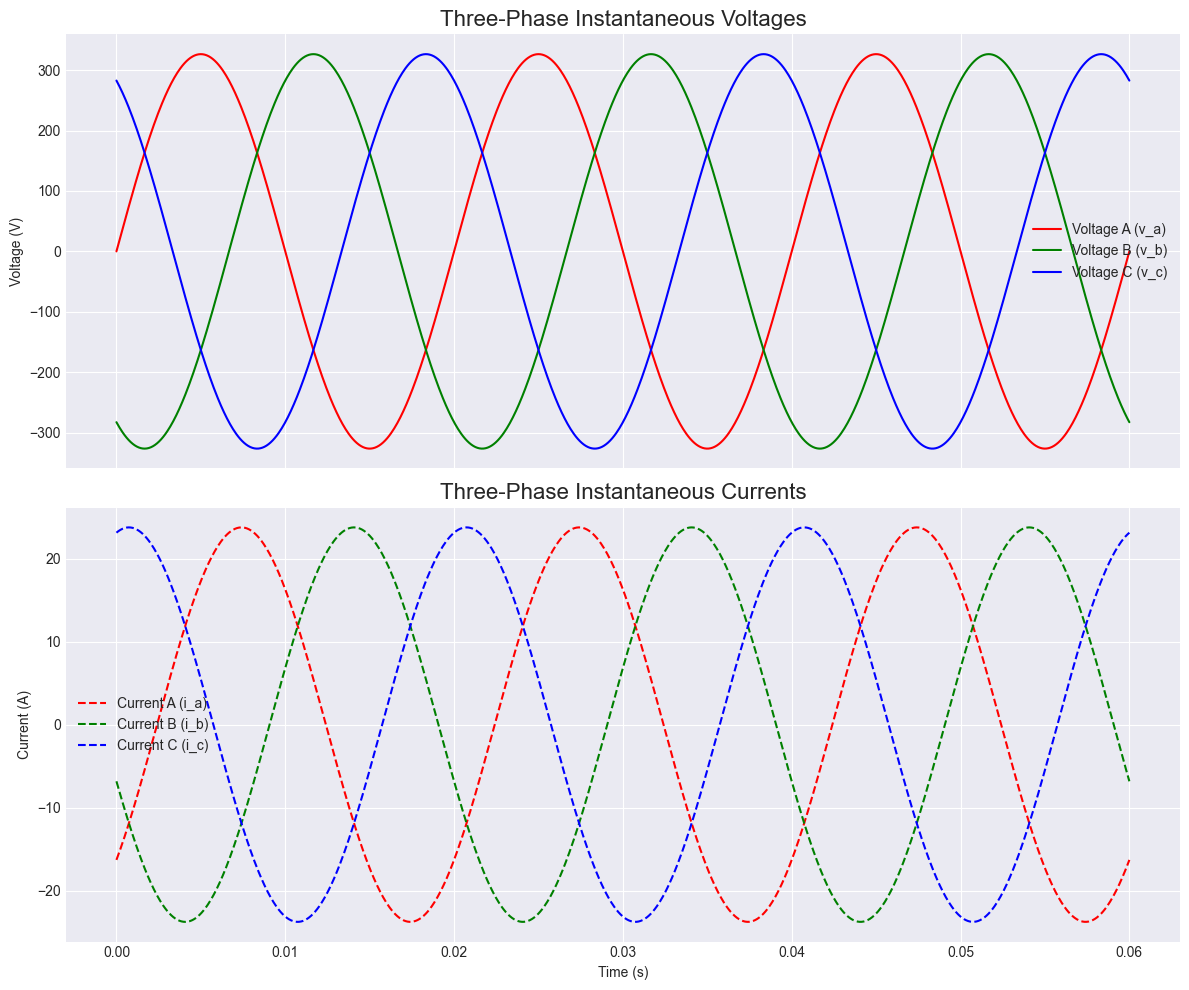

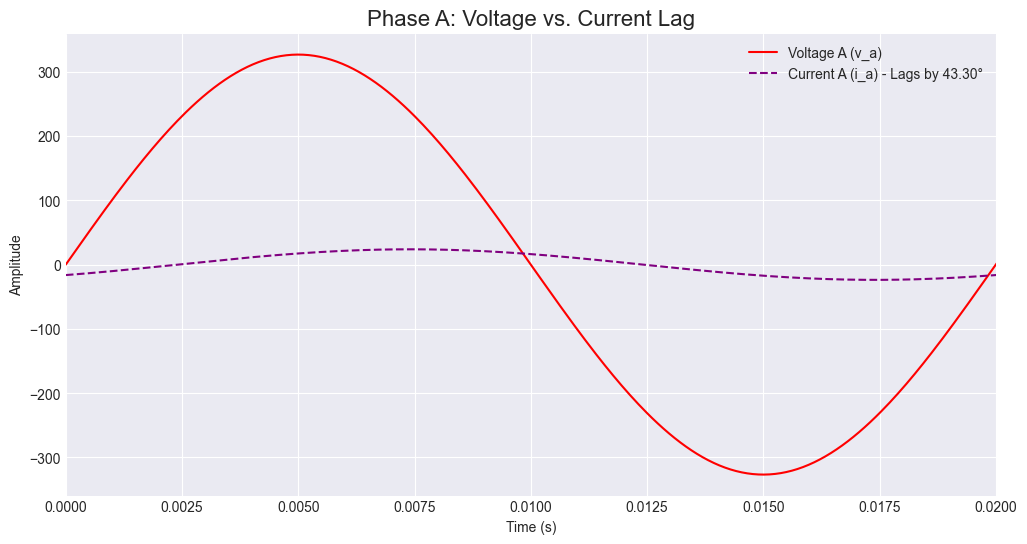

In [12]:
# --- Time-Domain Simulation ---
# Create a time vector for a few cycles
t = np.linspace(0, 3/freq, 1000) # 3 cycles, 1000 points

# Peak values for sine functions
V_peak = V_ph_rms * np.sqrt(2)
I_peak = I_mag * np.sqrt(2)

# Phase angles in radians
phase_A = 0
phase_B = -2 * np.pi / 3  # -120 degrees
phase_C = 2 * np.pi / 3   # +120 degrees

# --- Instantaneous Voltages ---
v_a = V_peak * np.sin(omega * t + phase_A)
v_b = V_peak * np.sin(omega * t + phase_B)
v_c = V_peak * np.sin(omega * t + phase_C)

# --- Instantaneous Currents ---
# Current has its own phase angle relative to voltage
i_a = I_peak * np.sin(omega * t + phase_A + I_angle_rad)
i_b = I_peak * np.sin(omega * t + phase_B + I_angle_rad)
i_c = I_peak * np.sin(omega * t + phase_C + I_angle_rad)

# --- Plotting ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot Voltages
ax1.plot(t, v_a, label='Voltage A (v_a)', color='red')
ax1.plot(t, v_b, label='Voltage B (v_b)', color='green')
ax1.plot(t, v_c, label='Voltage C (v_c)', color='blue')
ax1.set_title('Three-Phase Instantaneous Voltages', fontsize=16)
ax1.set_ylabel('Voltage (V)')
ax1.legend()
ax1.grid(True)

# Plot Currents
ax2.plot(t, i_a, label='Current A (i_a)', color='red', linestyle='--')
ax2.plot(t, i_b, label='Current B (i_b)', color='green', linestyle='--')
ax2.plot(t, i_c, label='Current C (i_c)', color='blue', linestyle='--')
ax2.set_title('Three-Phase Instantaneous Currents', fontsize=16)
ax2.set_ylabel('Current (A)')
ax2.set_xlabel('Time (s)')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# Zoom in on the first cycle to see the phase lag clearly
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(t, v_a, label='Voltage A (v_a)', color='red')
ax.plot(t, i_a, label=f'Current A (i_a) - Lags by {abs(I_angle_deg):.2f}°', color='purple', linestyle='--')
ax.set_title('Phase A: Voltage vs. Current Lag', fontsize=16)
ax.set_ylabel('Amplitude')
ax.set_xlabel('Time (s)')
ax.set_xlim(0, 1/freq) # Show one cycle
ax.legend()
ax.grid(True)
plt.show()

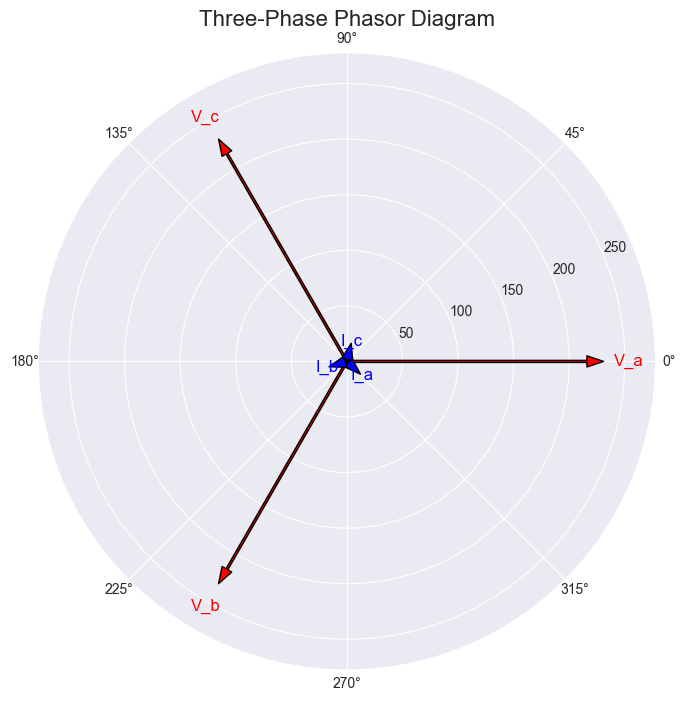

In [13]:
# Create a polar plot for the phasor diagram
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))

# --- Phasors (Magnitude, Angle in Radians) ---
phasors = {
    'V_a': (V_ph_rms, phase_A),
    'V_b': (V_ph_rms, phase_B),
    'V_c': (V_ph_rms, phase_C),
    'I_a': (I_mag, phase_A + I_angle_rad),
    'I_b': (I_mag, phase_B + I_angle_rad),
    'I_c': (I_mag, phase_C + I_angle_rad)
}

# Plot each phasor as an arrow from the origin
for name, (mag, angle) in phasors.items():
    # Use different colors for voltage and current
    color = 'red' if 'V' in name else 'blue'
    ax.annotate('', xy=(angle, mag), xytext=(0, 0),
                arrowprops=dict(facecolor=color, shrink=0, width=1.5, headwidth=8))
    
    # Add labels
    ax.text(angle, mag * 1.1, name, ha='center', va='center', fontsize=12, color=color)

ax.set_title('Three-Phase Phasor Diagram', fontsize=16, pad=20)
ax.set_rmax(V_ph_rms * 1.2) # Set radial limit to be slightly larger than voltage
ax.grid(True)
plt.show()

In [14]:
# --- Power Calculations ---
# Per-Phase Power using complex numbers
S_phase = V_ph_phasor * I_ph_phasor.conjugate()

# Extract Apparent, Active, and Reactive Power per phase
S_phase_mag = abs(S_phase)
P_phase = S_phase.real
Q_phase = S_phase.imag

# Total Power for the three-phase system
S_total = 3 * S_phase_mag
P_total = 3 * P_phase
Q_total = 3 * Q_phase

print("--- Power Calculation Results ---")
print("\n--- Per-Phase Power ---")
print(f"Complex Power (S_ph):   {S_phase:.2f} VA")
print(f"Apparent Power (|S_ph|): {S_phase_mag:.2f} VA")
print(f"Active Power (P_ph):      {P_phase:.2f} W")
print(f"Reactive Power (Q_ph):    {Q_phase:.2f} VAR")

print("\n--- Total Three-Phase Power ---")
print(f"Total Apparent Power (S_total): {S_total:.2f} VA")
print(f"Total Active Power (P_total):   {P_total:.2f} W")
print(f"Total Reactive Power (Q_total): {Q_total:.2f} VAR")

--- Power Calculation Results ---

--- Per-Phase Power ---
Complex Power (S_ph):   2824.46+2661.99j VA
Apparent Power (|S_ph|): 3881.21 VA
Active Power (P_ph):      2824.46 W
Reactive Power (Q_ph):    2661.99 VAR

--- Total Three-Phase Power ---
Total Apparent Power (S_total): 11643.63 VA
Total Active Power (P_total):   8473.39 W
Total Reactive Power (Q_total): 7985.98 VAR
